#   Makina Ogrenmesi Final Odevi

### Buket Calp

####    Paketler

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix, mean_squared_error

####    Veri Analizi

In [2]:
file_path = '/Users/buketcalp/Downloads/veri_makine.xlsx'
data = pd.read_excel(file_path, header=None)


columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


split_data = data[0].apply(lambda x: x.split())
data = pd.DataFrame(split_data.tolist(), columns=columns)


data = data.astype({
    'Pregnancies': int,
    'Glucose': int,
    'BloodPressure': int,
    'SkinThickness': int,
    'Insulin': int,
    'BMI': float,
    'DiabetesPedigreeFunction': float,
    'Age': int,
    'Outcome': int
})


data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#####  Eksik veri gözlemi

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Eksik veri gözlemlenmemektedir

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

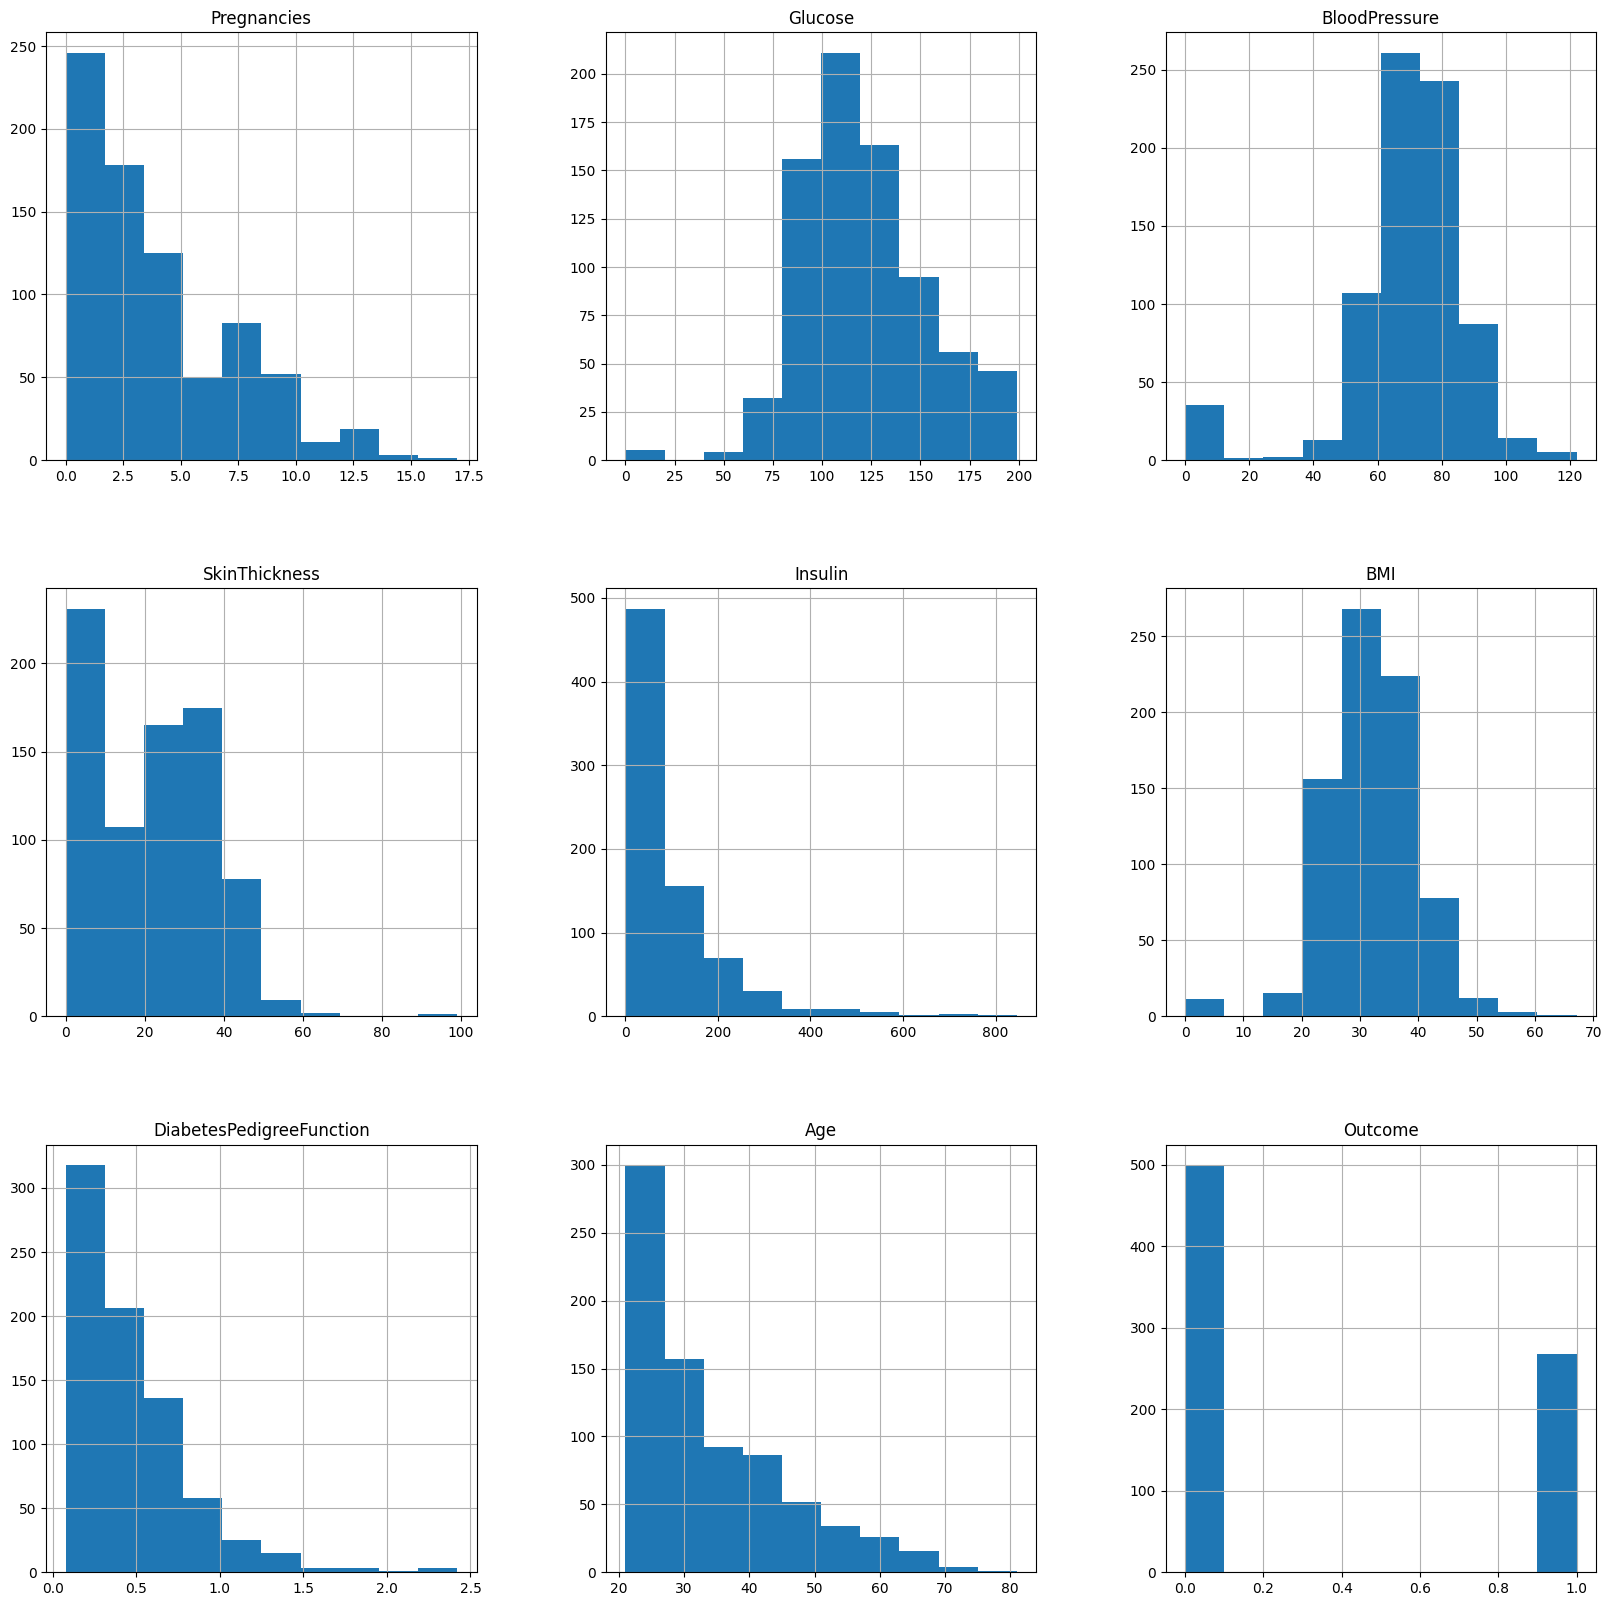

In [4]:
data.hist(figsize = (20,20))

Grafikte, gebelik sayısı, glukoz, kan basıncı, deri kalınlığı, insülin, vücut kitle indeksi (BMI), diyabet pedigree fonksiyonu, yaş ve diyabet sonucu gibi çeşitli sağlık ölçütlerinin dağılımlarını gösteren histogramlar yer alıyor. Gebelik sayıları genellikle düşük, glukoz ve BMI değerleri ise orta seviyelerde yoğunlaşmış. Kan basıncı normal aralıkta, deri kalınlığı ve insülin seviyeleri sağa çarpık bir dağılım sergiliyor. Diyabet pedigree fonksiyonu düşük değerlerde yoğunlaşırken, yaş çoğunlukla 20-50 arasında yer alıyor. Diyabet sonucu değişkeninde ise diyabet olmayan bireyler, diyabetli bireylerden daha fazla. 

<Axes: >

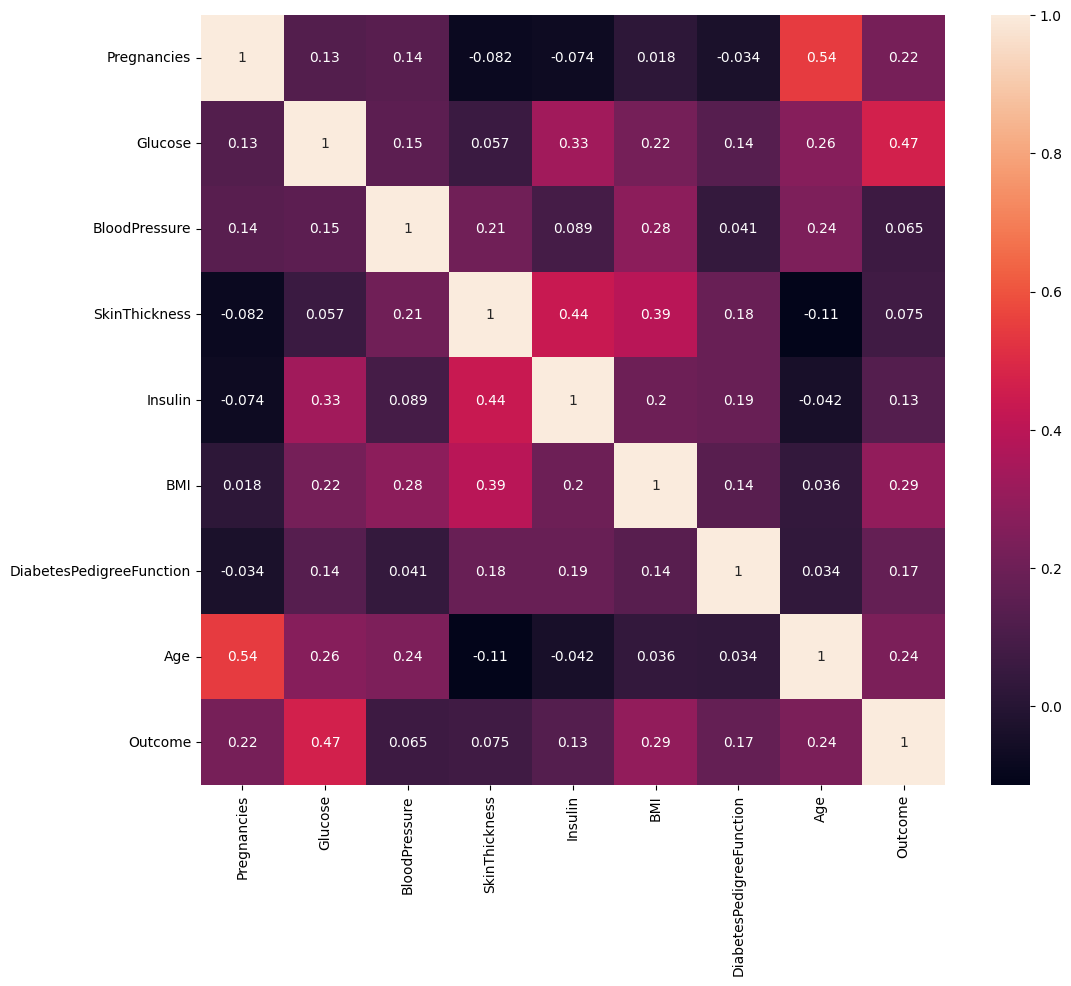

In [5]:
plt.figure(figsize=(12,10)) 
sns.heatmap(data.corr(), annot=True)

Glukoz ile diyabet sonucu arasında güçlü bir pozitif korelasyon (0.47) varken, yaş ve gebelik sayısı ile de orta düzeyde pozitif korelasyonlar gözlemleniyor (0.54 ve 0.22). İnsülin ve deri kalınlığı arasında (0.44) ve BMI ile deri kalınlığı arasında (0.39) belirgin pozitif ilişkiler var. Bunun yanı sıra, kan basıncı ve diğer değişkenler arasında genellikle düşük korelasyonlar bulunuyor.

###    Veriyi train-test olarak ayıralım

In [6]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2002)

Ilk olarak, "Outcome" sütunu veriden çıkarılır ve bu sütun hedef değişken olarak y değişkenine atıyoruz. Kalan veriler ise bağımsız değişkenler olarak X değişkeninde oluşturduk. Daha sonra, train_test_split fonksiyonu kullanılarak veriler, %70'i eğitim ve %30'u test olacak şekilde ikiye böldük. random_state=2002 ifadesi, veri bölünmesinin her seferinde aynı şekilde yapılmasını sağlıyor. 

####    Naive bayes sınıflandırıcısı

In [7]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])


pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)


print(f"Accuracy: {accuracy}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Mean Squared Error: {mse}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8138528138528138
ROC AUC Score: 0.879737609329446
Mean Squared Error: 0.18614718614718614
Confusion Matrix:
[[130  17]
 [ 26  58]]
Sensitivity: 0.6904761904761905
Specificity: 0.8843537414965986
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       147
           1       0.77      0.69      0.73        84

    accuracy                           0.81       231
   macro avg       0.80      0.79      0.79       231
weighted avg       0.81      0.81      0.81       231



Gaussian Naive Bayes modeli, %81.39 doğruluk oranı ve 0.88 ROC AUC skoru ile genel olarak iyi performans göstermektedir. 

Modelin ortalama kare hatası 0.186 olup, negatif sınıfı %88 duyarlılık ve %83 kesinlik ile, pozitif sınıfı ise %69 duyarlılık ve %77 kesinlik ile doğru bir şekilde tahmin etmektedir.

Karmaşıklık matrisinde 130 doğru negatif, 17 yanlış pozitif, 26 yanlış negatif ve 58 doğru pozitif bulunmaktadır. Modelin hassasiyeti %69.04 ve özgüllüğü %88.44'tür. 

Sınıflandırma raporu, modelin negatif sınıfları pozitif sınıflardan daha iyi tahmin ettiğini ve makro ortalama F1 skorunun %79, ağırlıklı ortalama F1 skorunun %81 olduğunu göstermektedir. Bu metrikler, modelin performansını değerlendirirken dikkate alınmalıdır.

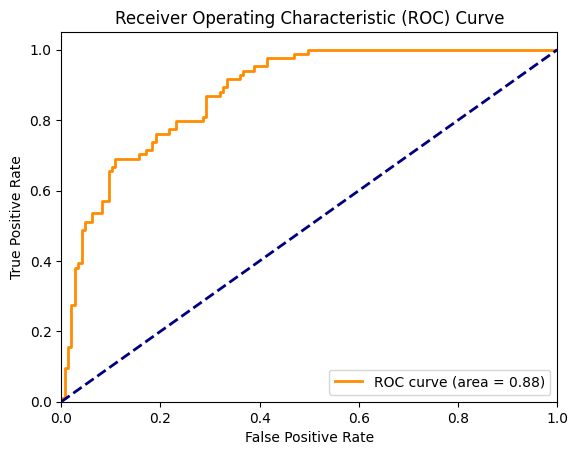

In [8]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Modelin yüksek doğru pozitif oranı ile düşük yanlış pozitif oranı arasındaki dengeyi iyi kurduğu görülmektedir. Sonuç olarak, bu ROC eğrisi ve AUC skoru, modelin genel performansının iyi olduğunu ve pozitif sınıfları doğru bir şekilde tanımlama konusunda güçlü olduğunu göstermektedir.

### K-en yakın komşuluk sınıflandırıcısını 

In [22]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])


pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)


print(f"Accuracy: {accuracy}")
print(f"Mean Squared Error: {mse}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.7532467532467533
Mean Squared Error: 0.24675324675324675
Confusion Matrix:
[[123  24]
 [ 33  51]]
Sensitivity: 0.6071428571428571
Specificity: 0.8367346938775511
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       147
           1       0.68      0.61      0.64        84

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.75      0.75       231



K-Nearest Neighbors sınıflandırıcısını kullanarak modelin performansını değerlendirir. Model, veri kümesindeki eksik değerleri medyan stratejisi ile doldurur, verileri standart ölçeklendirir ve ardından KNN sınıflandırıcısını kullanarak eğitilir.

Test verisi üzerindeki tahminler sonucu, modelin doğruluk oranı %75.32, ortalama kare hatası 0.247 olarak bulunmuştur. Karmaşıklık matrisi, 123 doğru negatif, 24 yanlış pozitif, 33 yanlış negatif ve 51 doğru pozitif sonuçlarını göstermektedir. 

Modelin hassasiyeti (sensitivity) %60.71 ve özgüllüğü (specificity) %83.67'dir. Sınıflandırma raporunda, negatif sınıf için kesinlik %79, duyarlılık %84 ve F1 skoru %81, pozitif sınıf için ise kesinlik %68, duyarlılık %61 ve F1 skoru %64 olarak hesaplanmıştır. Bu metrikler, modelin negatif sınıfları pozitif sınıflardan daha iyi tahmin ettiğini ve genel performansının orta seviyede olduğunu gösteriyor.

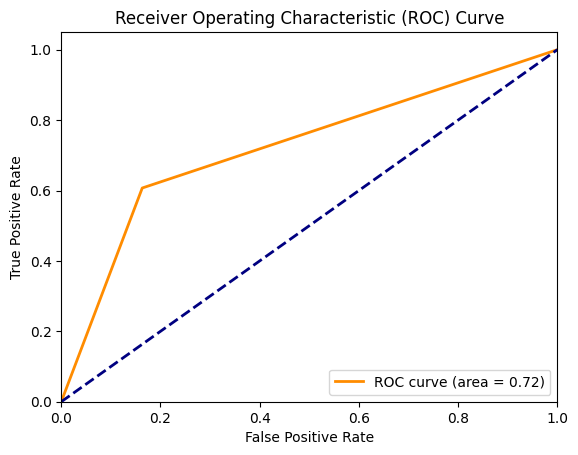

In [23]:
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

AUC skoru 0.72 olduğu için, modelin sınıflandırma performansının mükemmel olmadığını, fakat kabul edilebilir bir düzeyde olduğunu söyleyebiliriz. Bu sonuçlar, modelin daha fazla iyileştirme gerektirdiğini gösterebilir.

#### Cross-valiadtion ile KNN

In [24]:
param_grid = {'n_neighbors':np.arange(1,100)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7578558696205755
Best Parameters: {'n_neighbors': 14}


In [25]:
best_model = knn_cv.best_estimator_
y_pred = best_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)


print(f"Accuracy: {accuracy}")
print(f"Mean Squared Error: {mse}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8225108225108225
Mean Squared Error: 0.1774891774891775
Confusion Matrix:
[[135  12]
 [ 29  55]]
Sensitivity: 0.6547619047619048
Specificity: 0.9183673469387755
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       147
           1       0.82      0.65      0.73        84

    accuracy                           0.82       231
   macro avg       0.82      0.79      0.80       231
weighted avg       0.82      0.82      0.82       231



Modelin doğruluk oranı %82.25, ortalama kare hatası 0.177'dir. Karmaşıklık matrisi, 135 doğru negatif, 12 yanlış pozitif, 29 yanlış negatif ve 55 doğru pozitif sonuçları göstermektedir. Hassasiyet (sensitivity) %65.48 ve özgüllük (specificity) %91.84'tür. 

Sınıflandırma raporunda, negatif sınıf için kesinlik %82, duyarlılık %92 ve F1 skoru %87, pozitif sınıf için ise kesinlik %82, duyarlılık %65 ve F1 skoru %73 olarak hesaplanmıştır. Genel olarak, makro ortalama F1 skoru %80 ve ağırlıklı ortalama F1 skoru %82'dir. 

Bu sonuçlar, modelin negatif sınıfları daha iyi tahmin ettiğini, ancak pozitif sınıfların tahmininde biraz daha az başarılı olduğunu göstermektedir.

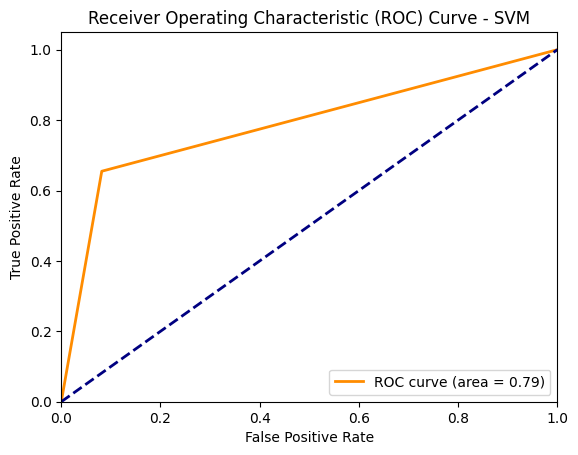

In [26]:
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred)
roc_auc_svm = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc="lower right")
plt.show()

AUC skoru 0.79, modelin genel performansının oldukça iyi olduğunu ve sınıflandırma görevinde başarılı olduğunu göstermektedir.

### Support Vector Machine

In [14]:
svm_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, random_state=2002))
])

svm_pipeline.fit(X_train, y_train)


y_pred_svm = svm_pipeline.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)

tn_svm, fp_svm, fn_svm, tp_svm = conf_matrix_svm.ravel()
sensitivity_svm = tp_svm / (tp_svm + fn_svm)
specificity_svm = tn_svm / (tn_svm + fp_svm)


print("\nSVM Classifier Results")
print(f"Accuracy: {accuracy_svm}")
print(f"Mean Squared Error: {mse_svm}")
print(f"Confusion Matrix:\n{conf_matrix_svm}")
print(f"Sensitivity: {sensitivity_svm}")
print(f"Specificity: {specificity_svm}")
print(f"Classification Report:\n{classification_rep_svm}")


SVM Classifier Results
Accuracy: 0.7965367965367965
Mean Squared Error: 0.20346320346320346
Confusion Matrix:
[[130  17]
 [ 30  54]]
Sensitivity: 0.6428571428571429
Specificity: 0.8843537414965986
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       147
           1       0.76      0.64      0.70        84

    accuracy                           0.80       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231



Eksik değerler medyan stratejisi ile doldurulur ve veriler standart ölçeklendirilir. Modelin doğruluk oranı %79.65, ortalama kare hatası 0.203'tür. Karmaşıklık matrisi, 130 doğru negatif, 17 yanlış pozitif, 30 yanlış negatif ve 54 doğru pozitif sonuçları göstermektedir. 

Hassasiyet (sensitivity) %64.29 ve özgüllük (specificity) %88.44'tür. Sınıflandırma raporunda, negatif sınıf için kesinlik %81, duyarlılık %88 ve F1 skoru %85, pozitif sınıf için ise kesinlik %76, duyarlılık %64 ve F1 skoru %70 olarak hesaplanmıştır. Genel olarak, makro ortalama F1 skoru %77 ve ağırlıklı ortalama F1 skoru %79'dur. 

Bu sonuçlar, SVM modelinin genel performansının iyi olduğunu, ancak pozitif sınıfların tahmininde biraz daha az başarılı olduğunu göstermektedir.

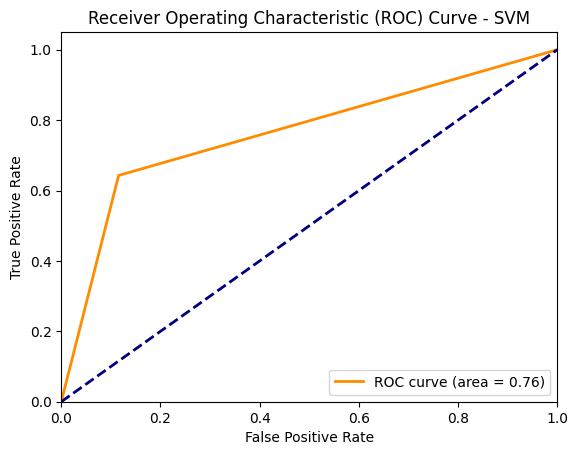

In [15]:
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)


plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc="lower right")
plt.show()

AUC skoru 0.76, modelin genel performansının kabul edilebilir düzeyde olduğunu ve sınıflandırma görevinde başarılı olduğunu göstermektedir. Ancak, iyileştirme yapılabilecek alanlar olduğunu da işaret eder. Bu sonuçlar, modelin farklı eşik değerlerinde pozitif sınıfları ayırt etme yeteneğini ortaya koyar.

####    Cross-Validation ile SVM

In [16]:
svm_param_grid = {
    'classifier__C': np.logspace(-3, 3, 7),  
    'classifier__gamma': np.logspace(-4, 0, 5),
    'classifier__kernel': ['rbf', 'linear', 'sigmoid'],
    'classifier__degree': [2, 3, 4]
}



svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=10, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)


best_svm_model = svm_grid_search.best_estimator_

In [17]:
y_pred_svm = best_svm_model.predict(X_test)


accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)

tn_svm, fp_svm, fn_svm, tp_svm = conf_matrix_svm.ravel()
sensitivity_svm = tp_svm / (tp_svm + fn_svm)
specificity_svm = tn_svm / (tn_svm + fp_svm)


print("\nSVM Classifier Results with Cross-Validation")
print(f"Best Parameters: {svm_grid_search.best_params_}")
print(f"Accuracy: {accuracy_svm}")
print(f"Mean Squared Error: {mse_svm}")
print(f"Confusion Matrix:\n{conf_matrix_svm}")
print(f"Sensitivity: {sensitivity_svm}")
print(f"Specificity: {specificity_svm}")
print(f"Classification Report:\n{classification_rep_svm}")


SVM Classifier Results with Cross-Validation
Best Parameters: {'classifier__C': 10.0, 'classifier__degree': 2, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}
Accuracy: 0.8095238095238095
Mean Squared Error: 0.19047619047619047
Confusion Matrix:
[[137  10]
 [ 34  50]]
Sensitivity: 0.5952380952380952
Specificity: 0.9319727891156463
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       147
           1       0.83      0.60      0.69        84

    accuracy                           0.81       231
   macro avg       0.82      0.76      0.78       231
weighted avg       0.81      0.81      0.80       231



En iyi parametreler, C=10.0, degree=2, gamma=0.001 ve kernel='rbf' olarak belirlenmiştir. Modelin doğruluk oranı %80.95, ortalama kare hatası 0.190'dır. Karmaşıklık matrisi, 137 doğru negatif, 10 yanlış pozitif, 34 yanlış negatif ve 50 doğru pozitif sonuçları göstermektedir. 

Hassasiyet (sensitivity) %59.52 ve özgüllük (specificity) %93.19'dur. Sınıflandırma raporunda, negatif sınıf için kesinlik %80, duyarlılık %93 ve F1 skoru %86, pozitif sınıf için ise kesinlik %83, duyarlılık %60 ve F1 skoru %69 olarak hesaplanmıştır. Genel olarak, makro ortalama F1 skoru %78 ve ağırlıklı ortalama F1 skoru %80'dir. 

Optimize edilmiş SVM modelinin genel performansının iyi olduğunu, ancak pozitif sınıfların tahmininde iyileştirme yapılabileceğini göstermektedir.

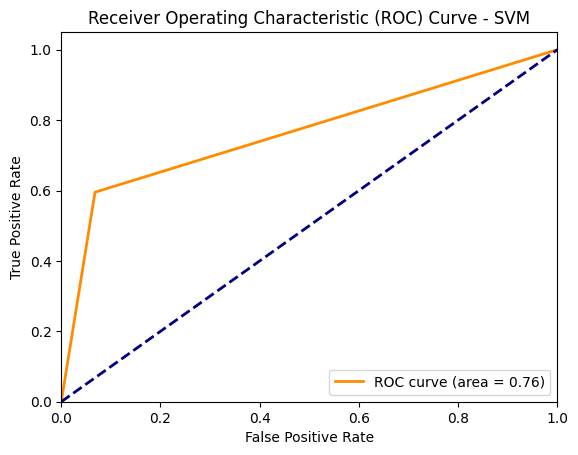

In [18]:
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc="lower right")
plt.show()

AUC skoru 0.76, modelin genel performansının kabul edilebilir düzeyde olduğunu ve sınıflandırma görevinde başarılı olduğunu göstermektedir. Ancak, iyileştirme yapılabilecek alanlar olduğunu da işaret eder. Fakat CV'siz modelden çokta farklı bir sonuç vermemiştir.

### Multi-Layer Perceptron 

In [19]:
mlp_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('classifier', MLPClassifier(max_iter=1000, random_state=2002, solver = "lbfgs")) 
])


mlp_pipeline.fit(X_train, y_train)
y_pred_mlp = mlp_pipeline.predict(X_test)


accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
classification_rep_mlp = classification_report(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)


tn_mlp, fp_mlp, fn_mlp, tp_mlp = conf_matrix_mlp.ravel()
sensitivity_mlp = tp_mlp / (tp_mlp + fn_mlp)
specificity_mlp = tn_mlp / (tn_mlp + fp_mlp)


print("MLP Classifier Results")
print(f"Accuracy: {accuracy_mlp}")
print(f"Mean Squared Error: {mse_mlp}")
print(f"Confusion Matrix:\n{conf_matrix_mlp}")
print(f"Sensitivity: {sensitivity_mlp}")
print(f"Specificity: {specificity_mlp}")
print(f"Classification Report:\n{classification_rep_mlp}")

MLP Classifier Results
Accuracy: 0.7316017316017316
Mean Squared Error: 0.2683982683982684
Confusion Matrix:
[[116  31]
 [ 31  53]]
Sensitivity: 0.6309523809523809
Specificity: 0.7891156462585034
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       147
           1       0.63      0.63      0.63        84

    accuracy                           0.73       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.73      0.73      0.73       231



Modelin doğruluk oranı %73.16, ortalama kare hatası 0.268'dir. Karmaşıklık matrisi, 116 doğru negatif, 31 yanlış pozitif, 31 yanlış negatif ve 53 doğru pozitif sonuçları göstermektedir. Modelin hassasiyeti (sensitivity) %63.10 ve özgüllüğü (specificity) %78.91'dir. Sınıflandırma raporunda, negatif sınıf için kesinlik %79, duyarlılık %79 ve F1 skoru %79, pozitif sınıf için ise kesinlik %63, duyarlılık %63 ve F1 skoru %63 olarak hesaplanmıştır. 

Genel olarak, makro ortalama F1 skoru %71 ve ağırlıklı ortalama F1 skoru %73'tür. Bu sonuçlar, MLP modelinin performansının orta düzeyde olduğunu ve hem negatif hem de pozitif sınıfların tahmininde iyileştirme yapılabileceğini göstermektedir.

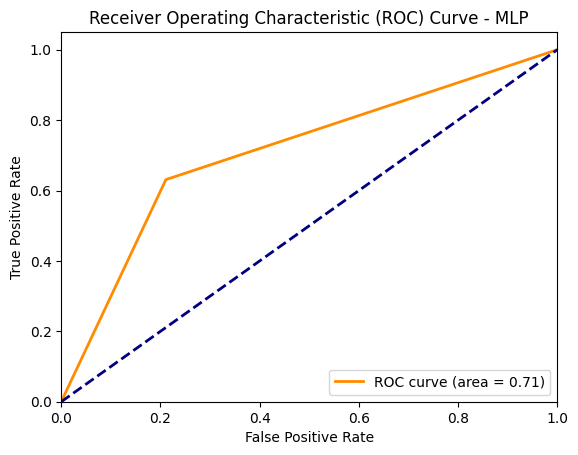

In [20]:
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_pred_mlp)


plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - MLP')
plt.legend(loc="lower right")
plt.show()

AUC skoru 0.71, modelin genel performansının kabul edilebilir olduğunu, ancak iyileştirme yapılabilecek alanlar olduğunu işaret etmektedir.

####    Cross-Validation ile Multi-Layer Perceptron 

In [16]:
mlp_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('classifier', MLPClassifier(max_iter=4000, random_state=2002, early_stopping=True, n_iter_no_change=10))
])

mlp_param_grid = {
    'classifier__hidden_layer_sizes': [
        (50,), (100,), (150,),
        (50, 50), (100, 50), (100, 100),
        (50, 50, 50), (100, 100, 50), (100, 100, 100),
        (50, 100), (100, 150), (150, 50),
        (50, 50, 100), (100, 50, 50), (150, 100, 50),
        (50, 50, 50, 50), (100, 50, 50, 50), (100, 100, 50, 50),
    ],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__solver': ['adam'],
    'classifier__alpha': [0.0001, 0.001, 0.009, 0.01, 0.015, 0.05, 0.1],
    'classifier__learning_rate': ['constant', 'adaptive'],
    'classifier__learning_rate_init': [0.001, 0.01, 0.05, 0.1],
}


mlp_grid_search = GridSearchCV(mlp_pipeline, mlp_param_grid, cv=5, scoring='accuracy')
mlp_grid_search.fit(X_train, y_train)

best_mlp_model = mlp_grid_search.best_estimator_
y_pred_mlp_cv = best_mlp_model.predict(X_test)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp_cv)
classification_rep_mlp = classification_report(y_test, y_pred_mlp_cv)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp_cv)
mse_mlp = mean_squared_error(y_test, y_pred_mlp_cv)

tn_mlp, fp_mlp, fn_mlp, tp_mlp = conf_matrix_mlp.ravel()
sensitivity_mlp = tp_mlp / (tp_mlp + fn_mlp)
specificity_mlp = tn_mlp / (tn_mlp + fp_mlp)

print("MLP Classifier Results with Cross-Validation")
print(f"Best Parameters: {mlp_grid_search.best_params_}")
print(f"Accuracy: {accuracy_mlp}")
print(f"Mean Squared Error: {mse_mlp}")
print(f"Confusion Matrix:\n{conf_matrix_mlp}")
print(f"Sensitivity: {sensitivity_mlp}")
print(f"Specificity: {specificity_mlp}")
print(f"Classification Report:\n{classification_rep_mlp}")

MLP Classifier Results with Cross-Validation
Best Parameters: {'classifier__activation': 'tanh', 'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (100,), 'classifier__learning_rate': 'constant', 'classifier__learning_rate_init': 0.01, 'classifier__solver': 'adam'}
Accuracy: 0.7922077922077922
Mean Squared Error: 0.2077922077922078
Confusion Matrix:
[[133  14]
 [ 34  50]]
Sensitivity: 0.5952380952380952
Specificity: 0.9047619047619048
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       147
           1       0.78      0.60      0.68        84

    accuracy                           0.79       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



En iyi parametreler; activation='tanh', alpha=0.1, hidden_layer_sizes=(100,), learning_rate='constant', learning_rate_init=0.01 ve solver='adam' olarak belirlenmiştir. Modelin doğruluk oranı %79.21, ortalama kare hatası 0.208'dir. 

Karmaşıklık matrisi, 133 doğru negatif, 14 yanlış pozitif, 34 yanlış negatif ve 50 doğru pozitif sonuçları göstermektedir. Hassasiyet (sensitivity) %59.52 ve özgüllük (specificity) %90.48'dir. Sınıflandırma raporunda, negatif sınıf için kesinlik %80, duyarlılık %90 ve F1 skoru %85, pozitif sınıf için ise kesinlik %78, duyarlılık %60 ve F1 skoru %68 olarak hesaplanmıştır. 

Makro ortalama F1 skoru %75 ve ağırlıklı ortalama F1 skoru %78'dir.

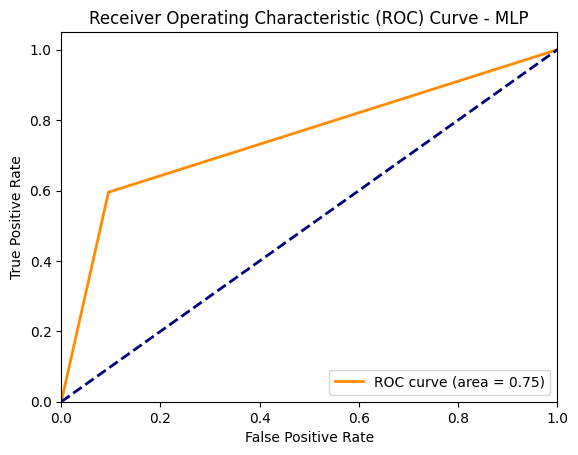

In [18]:
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp_cv)
roc_auc_mlp = roc_auc_score(y_test, y_pred_mlp_cv)


plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - MLP')
plt.legend(loc="lower right")
plt.show()

AUC skoru 0.75, modelin genel performansının kabul edilebilir olduğunu ve sınıflandırma görevinde başarılı olduğunu göstermektedir. 

##  Sonuç

Tüm modelleri değerlendirirken, doğruluk, ROC AUC skoru ve diğer metrikleri göz önünde bulundurmalıyız. Gaussian Naive Bayes modeli, %81.39 doğruluk oranı ve 0.88 ROC AUC skoru ile en yüksek performansı göstermektedir. Bununla birlikte, hassasiyet ve özgüllük değerleri de dengeli ve yüksek seviyededir.

Optimize edilmiş modeller arasında, SVM'nin doğruluk oranı %80.95 ve ROC AUC skoru 0.76 olup, performansı optimize edilmemiş Gaussian Naive Bayes modelinin gerisinde kalmaktadır. Optimize edilmiş MLP modelinin ROC AUC skoru 0.75 olup, diğer modellerden daha düşük bir performans sergilemektedir.

Sonuç olarak, Gaussian Naive Bayes modeli, tüm performans metrikleri dikkate alındığında en iyi model olarak öne çıkmaktadır. Bu model, yüksek doğruluk ve ROC AUC skoru ile sınıflandırma görevinde diğer modellerden daha başarılı görünmektedir.